## <b> Analyzing-and-Predicting-Calories-Burned </b>

### Data cleaning and preparation

##### Import the dataset and libraries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
dataset_1 = pd.read_csv('calories.csv' , index_col=0)
dataset_2 = pd.read_csv('exercise.csv', index_col=0)

In [3]:
dataset_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15000 entries, 14733363 to 11751526
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Calories  15000 non-null  float64
dtypes: float64(1)
memory usage: 234.4 KB


In [4]:
dataset_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15000 entries, 14733363 to 11751526
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      15000 non-null  object 
 1   Age         15000 non-null  int64  
 2   Height      15000 non-null  float64
 3   Weight      15000 non-null  float64
 4   Duration    15000 non-null  float64
 5   Heart_Rate  15000 non-null  float64
 6   Body_Temp   15000 non-null  float64
dtypes: float64(5), int64(1), object(1)
memory usage: 937.5+ KB


In [5]:
dataset_2.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
User_ID,,,,,,,
14733363,male,68,190.0,94.0,29.0,105.0,40.8
14861698,female,20,166.0,60.0,14.0,94.0,40.3
11179863,male,69,179.0,79.0,5.0,88.0,38.7
16180408,female,34,179.0,71.0,13.0,100.0,40.5
17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [6]:
dataset_1.head()

,Calories
User_ID,
14733363,231.0
14861698,66.0
11179863,26.0
16180408,71.0
17771927,35.0


In [7]:
dataset = pd.concat([dataset_1, dataset_2], axis=1)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15000 entries, 14733363 to 11751526
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Calories    15000 non-null  float64
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 1.0+ MB


There is no missing values.

### Exploratory data analysis

##### Age 

In [8]:
dataset['Age'].describe()

count    15000.000000
mean        42.789800
std         16.980264
min         20.000000
25%         28.000000
50%         39.000000
75%         56.000000
max         79.000000
Name: Age, dtype: float64

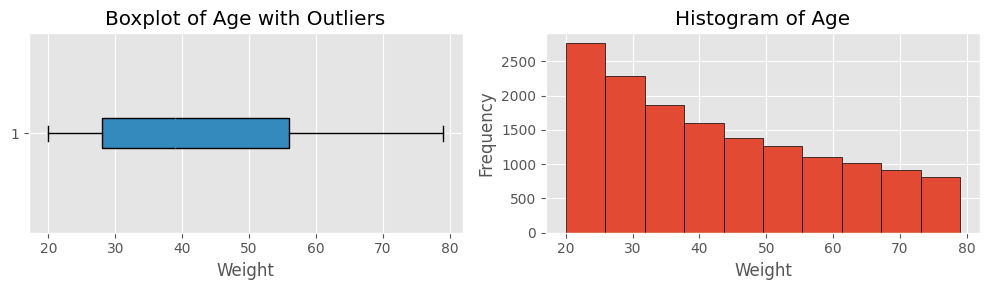

In [9]:
plt.style.use('ggplot')

fig, axs = plt.subplots(1, 2, figsize=(10, 3))

# Boxplot
axs[0].boxplot(dataset['Age'], vert=False, patch_artist=True)
axs[0].set_xlabel('Weight')
axs[0].set_title('Boxplot of Age with Outliers')

# Histogram
axs[1].hist(dataset['Age'], bins=10, edgecolor='black')
axs[1].set_xlabel('Weight')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Histogram of Age')

plt.tight_layout()
plt.show()

The Age data is right-skewed.

##### Height

In [10]:
dataset['Height'].describe()

count    15000.000000
mean       174.465133
std         14.258114
min        123.000000
25%        164.000000
50%        175.000000
75%        185.000000
max        222.000000
Name: Height, dtype: float64

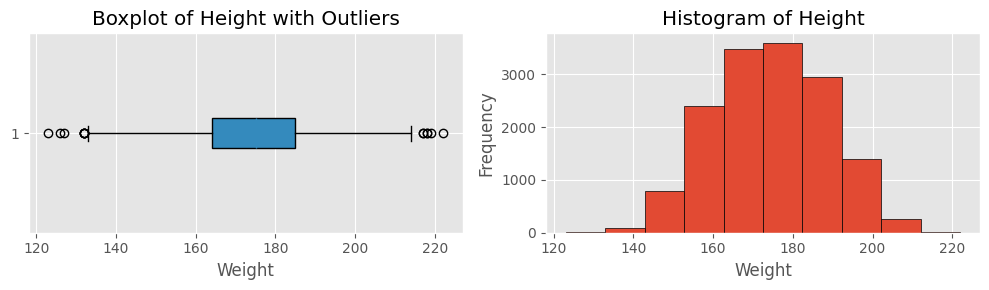

In [11]:
plt.style.use('ggplot')

fig, axs = plt.subplots(1, 2, figsize=(10, 3))

# Boxplot
axs[0].boxplot(dataset['Height'], vert=False, patch_artist=True)
axs[0].set_xlabel('Weight')
axs[0].set_title('Boxplot of Height with Outliers')

# Histogram
axs[1].hist(dataset['Height'], bins=10, edgecolor='black')
axs[1].set_xlabel('Weight')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Histogram of Height')

plt.tight_layout()
plt.show()

In [12]:
from scipy.stats import shapiro, kstest, anderson

# Shapiro-Wilk test
shapiro_stat, shapiro_p = shapiro(dataset['Height'])
print(f'Shapiro-Wilk Test: Statistics={shapiro_stat}, p-value={shapiro_p}')
if shapiro_p < 0.05:
    print("Shapiro-Wilk Test: Reject the null hypothesis (data is not normally distributed)")
else:
    print("Shapiro-Wilk Test: Fail to reject the null hypothesis (data is normally distributed)")

# Kolmogorov-Smirnov test
ks_stat, ks_p = kstest(dataset['Height'], 'norm', args=(dataset['Height'].mean(), dataset['Height'].std()))
print(f'Kolmogorov-Smirnov Test: Statistics={ks_stat}, p-value={ks_p}')
if ks_p < 0.05:
    print("Kolmogorov-Smirnov Test: Reject the null hypothesis (data is not normally distributed)")
else:
    print("Kolmogorov-Smirnov Test: Fail to reject the null hypothesis (data is normally distributed)")

# Anderson-Darling test
anderson_result = anderson(dataset['Height'], dist='norm')
print(f'Anderson-Darling Test: Statistic={anderson_result.statistic}')
for i in range(len(anderson_result.critical_values)):
    sl, cv = anderson_result.significance_level[i], anderson_result.critical_values[i]
    print(f'Significance Level: {sl}, Critical Value: {cv}')
    if anderson_result.statistic > cv:
        print(f"At {sl}% significance level: Reject the null hypothesis (data is not normally distributed)")
    else:
        print(f"At {sl}% significance level: Fail to reject the null hypothesis (data is normally distributed)")

Shapiro-Wilk Test: Statistics=0.9951174855232239, p-value=5.503629847801839e-22
Shapiro-Wilk Test: Reject the null hypothesis (data is not normally distributed)
Kolmogorov-Smirnov Test: Statistics=0.034585414262400915, p-value=5.042510175298167e-16
Kolmogorov-Smirnov Test: Reject the null hypothesis (data is not normally distributed)
Anderson-Darling Test: Statistic=22.64091578402622
Significance Level: 15.0, Critical Value: 0.576
At 15.0% significance level: Reject the null hypothesis (data is not normally distributed)
Significance Level: 10.0, Critical Value: 0.656
At 10.0% significance level: Reject the null hypothesis (data is not normally distributed)
Significance Level: 5.0, Critical Value: 0.787
At 5.0% significance level: Reject the null hypothesis (data is not normally distributed)
Significance Level: 2.5, Critical Value: 0.918
At 2.5% significance level: Reject the null hypothesis (data is not normally distributed)
Significance Level: 1.0, Critical Value: 1.092
At 1.0% signif

c:\Users\pc\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


The boxplot of the Height column reveals some outliers on both sides; however, we do not consider them as true outliers. And the dataset isn't follow a normal distribution.

##### Weight

In [13]:
dataset['Weight'].describe()

count    15000.000000
mean        74.966867
std         15.035657
min         36.000000
25%         63.000000
50%         74.000000
75%         87.000000
max        132.000000
Name: Weight, dtype: float64

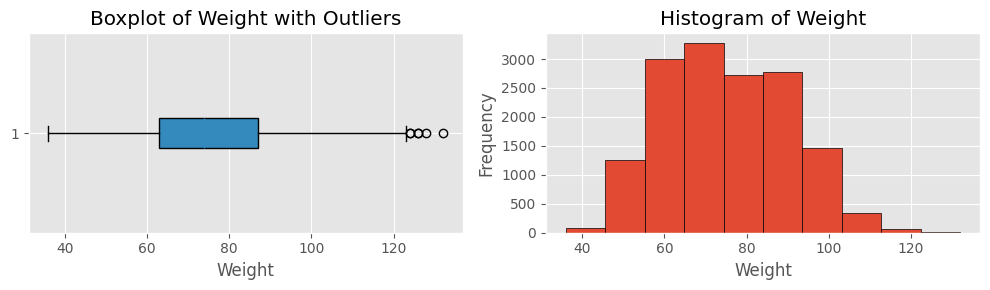

In [14]:
plt.style.use('ggplot')

fig, axs = plt.subplots(1, 2, figsize=(10, 3))

# Boxplot
axs[0].boxplot(dataset['Weight'], vert=False, patch_artist=True)
axs[0].set_xlabel('Weight')
axs[0].set_title('Boxplot of Weight with Outliers')

# Histogram
axs[1].hist(dataset['Weight'], bins=10, edgecolor='black')
axs[1].set_xlabel('Weight')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Histogram of Weight')

plt.tight_layout()
plt.show()

In [15]:
from scipy.stats import shapiro, kstest, anderson

# Shapiro-Wilk test
shapiro_stat, shapiro_p = shapiro(dataset['Weight'])
print(f'Shapiro-Wilk Test: Statistics={shapiro_stat}, p-value={shapiro_p}')
if shapiro_p < 0.05:
    print("Shapiro-Wilk Test: Reject the null hypothesis (data is not normally distributed)")
else:
    print("Shapiro-Wilk Test: Fail to reject the null hypothesis (data is normally distributed)")

# Kolmogorov-Smirnov test
ks_stat, ks_p = kstest(dataset['Weight'], 'norm', args=(dataset['Weight'].mean(), dataset['Weight'].std()))
print(f'Kolmogorov-Smirnov Test: Statistics={ks_stat}, p-value={ks_p}')
if ks_p < 0.05:
    print("Kolmogorov-Smirnov Test: Reject the null hypothesis (data is not normally distributed)")
else:
    print("Kolmogorov-Smirnov Test: Fail to reject the null hypothesis (data is normally distributed)")

# Anderson-Darling test
anderson_result = anderson(dataset['Weight'], dist='norm')
print(f'Anderson-Darling Test: Statistic={anderson_result.statistic}')
for i in range(len(anderson_result.critical_values)):
    sl, cv = anderson_result.significance_level[i], anderson_result.critical_values[i]
    print(f'Significance Level: {sl}, Critical Value: {cv}')
    if anderson_result.statistic > cv:
        print(f"At {sl}% significance level: Reject the null hypothesis (data is not normally distributed)")
    else:
        print(f"At {sl}% significance level: Fail to reject the null hypothesis (data is normally distributed)")

Shapiro-Wilk Test: Statistics=0.9838180541992188, p-value=7.37295485133984e-38
Shapiro-Wilk Test: Reject the null hypothesis (data is not normally distributed)
Kolmogorov-Smirnov Test: Statistics=0.0658455109466623, p-value=5.4954667683461e-57
Kolmogorov-Smirnov Test: Reject the null hypothesis (data is not normally distributed)
Anderson-Darling Test: Statistic=77.79723164457027
Significance Level: 15.0, Critical Value: 0.576
At 15.0% significance level: Reject the null hypothesis (data is not normally distributed)
Significance Level: 10.0, Critical Value: 0.656
At 10.0% significance level: Reject the null hypothesis (data is not normally distributed)
Significance Level: 5.0, Critical Value: 0.787
At 5.0% significance level: Reject the null hypothesis (data is not normally distributed)
Significance Level: 2.5, Critical Value: 0.918
At 2.5% significance level: Reject the null hypothesis (data is not normally distributed)
Significance Level: 1.0, Critical Value: 1.092
At 1.0% significanc

c:\Users\pc\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


The boxplot indicates the presence of outliers, which are located only on the right side. Therefore, appropriate action needs to be taken to address them.

##### Heart_Rate

In [16]:
dataset['Heart_Rate'].describe()

count    15000.000000
mean        95.518533
std          9.583328
min         67.000000
25%         88.000000
50%         96.000000
75%        103.000000
max        128.000000
Name: Heart_Rate, dtype: float64

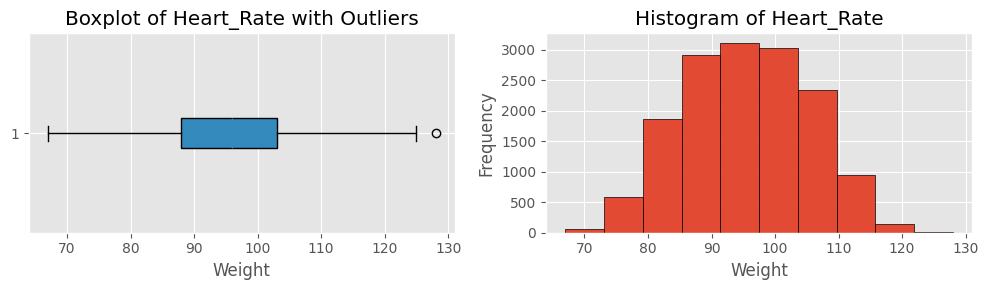

In [17]:
plt.style.use('ggplot')

fig, axs = plt.subplots(1, 2, figsize=(10, 3))

# Boxplot
axs[0].boxplot(dataset['Heart_Rate'], vert=False, patch_artist=True)
axs[0].set_xlabel('Weight')
axs[0].set_title('Boxplot of Heart_Rate with Outliers')

# Histogram
axs[1].hist(dataset['Heart_Rate'], bins=10, edgecolor='black')
axs[1].set_xlabel('Weight')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Histogram of Heart_Rate')

plt.tight_layout()
plt.show()

In [18]:
from scipy.stats import shapiro, kstest, anderson

# Shapiro-Wilk test
shapiro_stat, shapiro_p = shapiro(dataset['Heart_Rate'])
print(f'Shapiro-Wilk Test: Statistics={shapiro_stat}, p-value={shapiro_p}')
if shapiro_p < 0.05:
    print("Shapiro-Wilk Test: Reject the null hypothesis (data is not normally distributed)")
else:
    print("Shapiro-Wilk Test: Fail to reject the null hypothesis (data is normally distributed)")

# Kolmogorov-Smirnov test
ks_stat, ks_p = kstest(dataset['Heart_Rate'], 'norm', args=(dataset['Heart_Rate'].mean(), dataset['Heart_Rate'].std()))
print(f'Kolmogorov-Smirnov Test: Statistics={ks_stat}, p-value={ks_p}')
if ks_p < 0.05:
    print("Kolmogorov-Smirnov Test: Reject the null hypothesis (data is not normally distributed)")
else:
    print("Kolmogorov-Smirnov Test: Fail to reject the null hypothesis (data is normally distributed)")

# Anderson-Darling test
anderson_result = anderson(dataset['Heart_Rate'], dist='norm')
print(f'Anderson-Darling Test: Statistic={anderson_result.statistic}')
for i in range(len(anderson_result.critical_values)):
    sl, cv = anderson_result.significance_level[i], anderson_result.critical_values[i]
    print(f'Significance Level: {sl}, Critical Value: {cv}')
    if anderson_result.statistic > cv:
        print(f"At {sl}% significance level: Reject the null hypothesis (data is not normally distributed)")
    else:
        print(f"At {sl}% significance level: Fail to reject the null hypothesis (data is normally distributed)")

Shapiro-Wilk Test: Statistics=0.9917457699775696, p-value=2.1995159967072203e-28
Shapiro-Wilk Test: Reject the null hypothesis (data is not normally distributed)
Kolmogorov-Smirnov Test: Statistics=0.04479871398837054, p-value=1.3454708741306843e-26
Kolmogorov-Smirnov Test: Reject the null hypothesis (data is not normally distributed)
Anderson-Darling Test: Statistic=36.65856422660727
Significance Level: 15.0, Critical Value: 0.576
At 15.0% significance level: Reject the null hypothesis (data is not normally distributed)
Significance Level: 10.0, Critical Value: 0.656
At 10.0% significance level: Reject the null hypothesis (data is not normally distributed)
Significance Level: 5.0, Critical Value: 0.787
At 5.0% significance level: Reject the null hypothesis (data is not normally distributed)
Significance Level: 2.5, Critical Value: 0.918
At 2.5% significance level: Reject the null hypothesis (data is not normally distributed)
Significance Level: 1.0, Critical Value: 1.092
At 1.0% signi

c:\Users\pc\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


The boxplot shows an outlier in the weight data, appearing only on the right side. Therefore, it is necessary to take appropriate action to address it.

##### Body temp

In [19]:
dataset['Body_Temp'].describe()

count    15000.000000
mean        40.025453
std          0.779230
min         37.100000
25%         39.600000
50%         40.200000
75%         40.600000
max         41.500000
Name: Body_Temp, dtype: float64

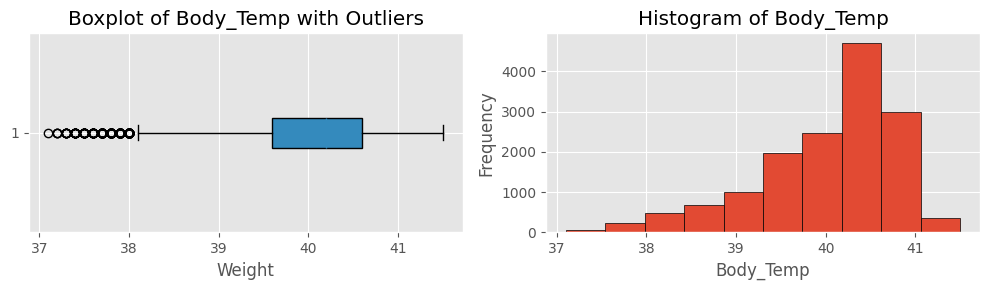

In [20]:
plt.style.use('ggplot')

fig, axs = plt.subplots(1, 2, figsize=(10, 3))

# Boxplot
axs[0].boxplot(dataset['Body_Temp'], vert=False, patch_artist=True)
axs[0].set_xlabel('Weight')
axs[0].set_title('Boxplot of Body_Temp with Outliers')

# Histogram
axs[1].hist(dataset['Body_Temp'], bins=10, edgecolor='black')
axs[1].set_xlabel('Body_Temp')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Histogram of Body_Temp')

plt.tight_layout()
plt.show()

The boxplot shows the presence of outliers, and the distribution of body temperature is left-skewed.

##### Duration

In [23]:
dataset['Duration'].describe()

count    15000.000000
mean        15.530600
std          8.319203
min          1.000000
25%          8.000000
50%         16.000000
75%         23.000000
max         30.000000
Name: Duration, dtype: float64

In [24]:
print(dataset['Duration'].unique())

[29. 14.  5. 13. 10. 23. 22. 25. 21. 16.  1. 17. 11. 18.  2. 28.  4.  8.
  3.  7. 24. 20.  9. 15. 19. 27. 12. 26.  6. 30.]


The duration is a categorical variable, so we need to encode it for analysis.

##### Calories

In [25]:
dataset['Calories'].describe()

count    15000.000000
mean        89.539533
std         62.456978
min          1.000000
25%         35.000000
50%         79.000000
75%        138.000000
max        314.000000
Name: Calories, dtype: float64

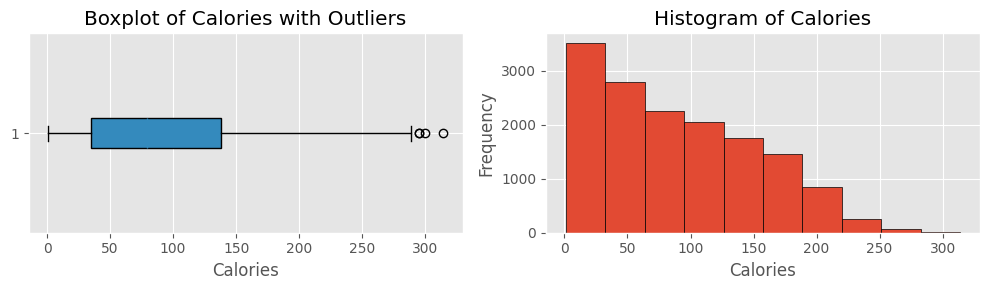

In [26]:
plt.style.use('ggplot')

fig, axs = plt.subplots(1, 2, figsize=(10, 3))

# Boxplot
axs[0].boxplot(dataset['Calories'], vert=False, patch_artist=True)
axs[0].set_xlabel('Calories')
axs[0].set_title('Boxplot of Calories with Outliers')

# Histogram
axs[1].hist(dataset['Calories'], bins=10, edgecolor='black')
axs[1].set_xlabel('Calories')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Histogram of Calories')

plt.tight_layout()
plt.show()

The boxplot shows the presence of outliers, and the Calories data is right-skewed.

### Data cleaning and preparation

##### Encode categorical variables

Encode the Duration and Gender fields

In [27]:
print(dataset.columns)
print(dataset['Duration'].unique())
print(len(dataset['Duration'].unique()))


Index(['Calories', 'Gender', 'Age', 'Height', 'Weight', 'Duration',
       'Heart_Rate', 'Body_Temp'],
      dtype='object')
[29. 14.  5. 13. 10. 23. 22. 25. 21. 16.  1. 17. 11. 18.  2. 28.  4.  8.
  3.  7. 24. 20.  9. 15. 19. 27. 12. 26.  6. 30.]
30


In [28]:
# One-hot encode the Duration column
duration_dummies = pd.get_dummies(dataset['Duration'], prefix='duration')

# Concatenate the original dataset with the new one-hot encoded columns
dataset = pd.concat([dataset, duration_dummies], axis=1)

# Drop the original Duration column
dataset.drop('Duration', axis=1, inplace=True)

dataset.head()

,Calories,Gender,Age,Height,Weight,Heart_Rate,Body_Temp,duration_1.0,duration_2.0,duration_3.0,...,duration_21.0,duration_22.0,duration_23.0,duration_24.0,duration_25.0,duration_26.0,duration_27.0,duration_28.0,duration_29.0,duration_30.0
User_ID,,,,,,,,,,,,,,,,,,,,,
14733363,231.0,male,68,190.0,94.0,105.0,40.8,False,False,False,...,False,False,False,False,False,False,False,False,True,False
14861698,66.0,female,20,166.0,60.0,94.0,40.3,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11179863,26.0,male,69,179.0,79.0,88.0,38.7,False,False,False,...,False,False,False,False,False,False,False,False,False,False
16180408,71.0,female,34,179.0,71.0,100.0,40.5,False,False,False,...,False,False,False,False,False,False,False,False,False,False
17771927,35.0,female,27,154.0,58.0,81.0,39.8,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [29]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
le = LabelEncoder()

# Fit and transform the Gender column
dataset['Gender'] = le.fit_transform(dataset['Gender'])

dataset.head()

,Calories,Gender,Age,Height,Weight,Heart_Rate,Body_Temp,duration_1.0,duration_2.0,duration_3.0,...,duration_21.0,duration_22.0,duration_23.0,duration_24.0,duration_25.0,duration_26.0,duration_27.0,duration_28.0,duration_29.0,duration_30.0
User_ID,,,,,,,,,,,,,,,,,,,,,
14733363,231.0,1,68,190.0,94.0,105.0,40.8,False,False,False,...,False,False,False,False,False,False,False,False,True,False
14861698,66.0,0,20,166.0,60.0,94.0,40.3,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11179863,26.0,1,69,179.0,79.0,88.0,38.7,False,False,False,...,False,False,False,False,False,False,False,False,False,False
16180408,71.0,0,34,179.0,71.0,100.0,40.5,False,False,False,...,False,False,False,False,False,False,False,False,False,False
17771927,35.0,0,27,154.0,58.0,81.0,39.8,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [30]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15000 entries, 14733363 to 11751526
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Calories       15000 non-null  float64
 1   Gender         15000 non-null  int32  
 2   Age            15000 non-null  int64  
 3   Height         15000 non-null  float64
 4   Weight         15000 non-null  float64
 5   Heart_Rate     15000 non-null  float64
 6   Body_Temp      15000 non-null  float64
 7   duration_1.0   15000 non-null  bool   
 8   duration_2.0   15000 non-null  bool   
 9   duration_3.0   15000 non-null  bool   
 10  duration_4.0   15000 non-null  bool   
 11  duration_5.0   15000 non-null  bool   
 12  duration_6.0   15000 non-null  bool   
 13  duration_7.0   15000 non-null  bool   
 14  duration_8.0   15000 non-null  bool   
 15  duration_9.0   15000 non-null  bool   
 16  duration_10.0  15000 non-null  bool   
 17  duration_11.0  15000 non-null  bool   
 18  d

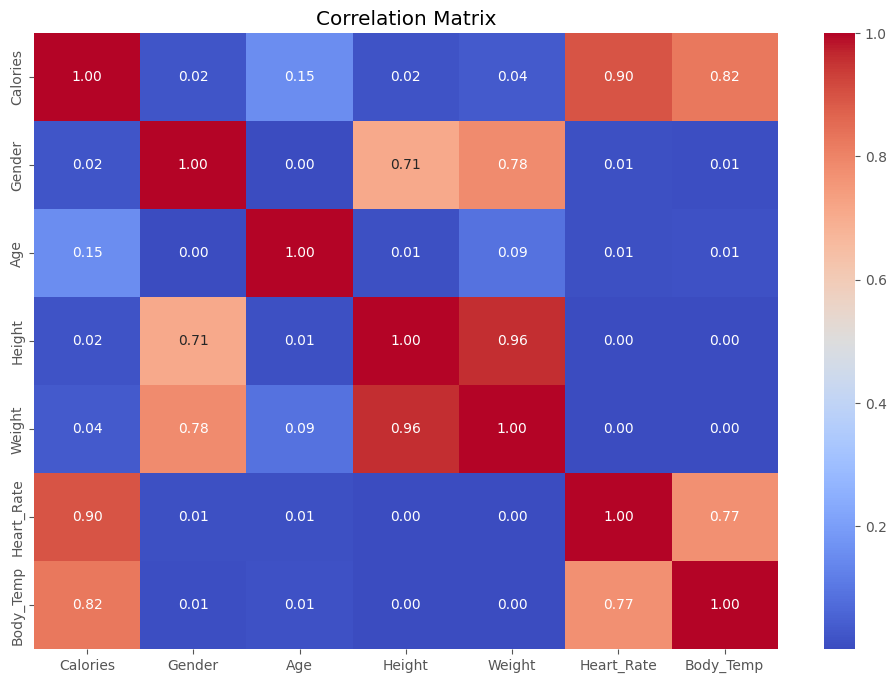

In [31]:
import seaborn as sns

# Calculate the correlation matrix
corr_matrix = dataset[['Calories','Gender','Age','Height','Weight','Heart_Rate','Body_Temp']].corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

##### Handle the outliars

The weight and height are highly positively correlated, so to handle the outliers, we fit a line and replace the outliers with the values on the line.

In [32]:
from sklearn.linear_model import LinearRegression

Q1 = dataset['Weight'].quantile(0.25)
Q3 = dataset['Weight'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the dataset to remove the outliers
x = dataset[(dataset['Weight'] >= lower_bound) & (dataset['Weight'] <= upper_bound)]['Height'].values.reshape(-1, 1)
y = dataset[(dataset['Weight'] >= lower_bound) & (dataset['Weight'] <= upper_bound)]['Weight'].values

# Create and fit the model
model = LinearRegression()
model.fit(x, y)


LinearRegression()

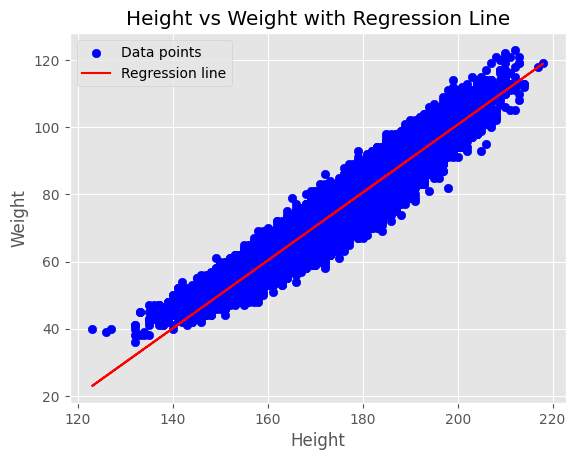

In [33]:
# Plot the data and the regression line
plt.scatter(dataset[(dataset['Weight'] >= lower_bound) & (dataset['Weight'] <= upper_bound)]['Height'], dataset[(dataset['Weight'] >= lower_bound) & (dataset['Weight'] <= upper_bound)]['Weight'], color='blue', label='Data points')
plt.plot(dataset[(dataset['Weight'] >= lower_bound) & (dataset['Weight'] <= upper_bound)]['Height'], model.predict(x), color='red', label='Regression line')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Height vs Weight with Regression Line')
plt.legend()
plt.show()

In [34]:
# Predict the weights for the outliers using the regression model
predicted_weights = model.predict(dataset[(dataset['Weight'] < lower_bound) | (dataset['Weight'] > upper_bound)]['Height'].values.reshape(-1, 1))

# Replace the outliers with the predicted weights
dataset.loc[(dataset['Weight'] < lower_bound) | (dataset['Weight'] > upper_bound), 'Weight'] = predicted_weights

# Verify the changes
dataset[(dataset['Weight'] < lower_bound) | (dataset['Weight'] > upper_bound)]

,Calories,Gender,Age,Height,Weight,Heart_Rate,Body_Temp,duration_1.0,duration_2.0,duration_3.0,...,duration_21.0,duration_22.0,duration_23.0,duration_24.0,duration_25.0,duration_26.0,duration_27.0,duration_28.0,duration_29.0,duration_30.0
User_ID,,,,,,,,,,,,,,,,,,,,,


In [35]:
from sklearn.linear_model import LinearRegression

Q1 = dataset['Heart_Rate'].quantile(0.25)
Q3 = dataset['Heart_Rate'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

dataset[(dataset['Heart_Rate'] < lower_bound) | (dataset['Heart_Rate'] > upper_bound)]




,Calories,Gender,Age,Height,Weight,Heart_Rate,Body_Temp,duration_1.0,duration_2.0,duration_3.0,...,duration_21.0,duration_22.0,duration_23.0,duration_24.0,duration_25.0,duration_26.0,duration_27.0,duration_28.0,duration_29.0,duration_30.0
User_ID,,,,,,,,,,,,,,,,,,,,,
12114332,289.0,1,32,188.0,91.0,128.0,40.9,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [36]:
# Filter the dataset to remove the outliers
x = dataset[(dataset['Heart_Rate'] >= lower_bound) & (dataset['Heart_Rate'] <= upper_bound)]['Calories'].values.reshape(-1, 1)
y = dataset[(dataset['Heart_Rate'] >= lower_bound) & (dataset['Heart_Rate'] <= upper_bound)]['Heart_Rate'].values

# Create and fit the model
model = LinearRegression()
model.fit(x, y)

LinearRegression()

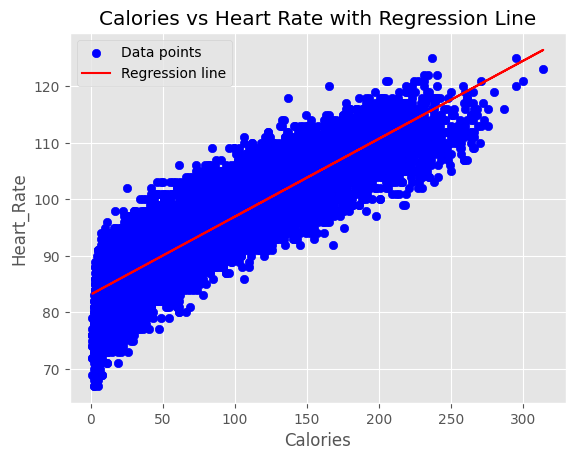

In [37]:
# Plot the data and the regression line
plt.scatter(dataset[(dataset['Heart_Rate'] >= lower_bound) & (dataset['Heart_Rate'] <= upper_bound)]['Calories'], dataset[(dataset['Heart_Rate'] >= lower_bound) & (dataset['Heart_Rate'] <= upper_bound)]['Heart_Rate'], color='blue', label='Data points')
plt.plot(dataset[(dataset['Heart_Rate'] >= lower_bound) & (dataset['Heart_Rate'] <= upper_bound)]['Calories'], model.predict(x), color='red', label='Regression line')
plt.xlabel('Calories')
plt.ylabel('Heart_Rate')
plt.title('Calories vs Heart Rate with Regression Line')
plt.legend()
plt.show()

In [38]:
# Predict the heart rates for the outliers using the regression model
predicted_heart_rate = model.predict(dataset[(dataset['Heart_Rate'] < lower_bound) | (dataset['Heart_Rate'] > upper_bound)]['Calories'].values.reshape(-1, 1))

# Replace the outliers with the predicted weights
dataset.loc[(dataset['Heart_Rate'] < lower_bound) | (dataset['Heart_Rate'] > upper_bound), 'Heart_Rate'] = predicted_heart_rate

# Verify the changes
dataset[(dataset['Heart_Rate'] < lower_bound) | (dataset['Heart_Rate'] > upper_bound)]

,Calories,Gender,Age,Height,Weight,Heart_Rate,Body_Temp,duration_1.0,duration_2.0,duration_3.0,...,duration_21.0,duration_22.0,duration_23.0,duration_24.0,duration_25.0,duration_26.0,duration_27.0,duration_28.0,duration_29.0,duration_30.0
User_ID,,,,,,,,,,,,,,,,,,,,,


In [39]:
from sklearn.linear_model import LinearRegression

Q1 = dataset['Calories'].quantile(0.25)
Q3 = dataset['Calories'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

dataset[(dataset['Calories'] < lower_bound) | (dataset['Calories'] > upper_bound)]

,Calories,Gender,Age,Height,Weight,Heart_Rate,Body_Temp,duration_1.0,duration_2.0,duration_3.0,...,duration_21.0,duration_22.0,duration_23.0,duration_24.0,duration_25.0,duration_26.0,duration_27.0,duration_28.0,duration_29.0,duration_30.0
User_ID,,,,,,,,,,,,,,,,,,,,,
13079051,314.0,1,75,199.0,103.0,123.0,40.5,False,False,False,...,False,False,False,False,False,False,False,True,False,False
17825244,295.0,1,65,189.0,98.0,125.0,40.9,False,False,False,...,False,False,False,False,False,False,True,False,False,False
17545969,300.0,1,69,193.0,90.0,121.0,41.1,False,False,False,...,False,False,False,False,False,False,False,False,True,False
10784322,295.0,1,75,178.0,76.0,120.0,40.8,False,False,False,...,False,False,False,False,False,False,False,False,True,False


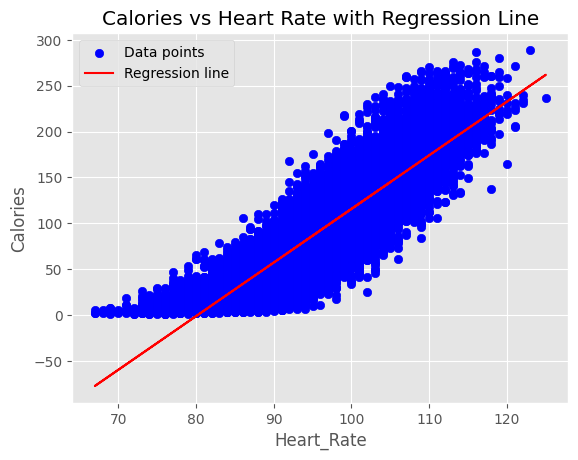

In [40]:
# Filter the dataset to remove the outliers
x = dataset[(dataset['Calories'] >= lower_bound) & (dataset['Calories'] <= upper_bound)]['Heart_Rate'].values.reshape(-1, 1)
y = dataset[(dataset['Calories'] >= lower_bound) & (dataset['Calories'] <= upper_bound)]['Calories'].values

# Create and fit the model
model = LinearRegression()
model.fit(x, y)

# Plot the data and the regression line
plt.scatter(dataset[(dataset['Calories'] >= lower_bound) & (dataset['Calories'] <= upper_bound)]['Heart_Rate'], dataset[(dataset['Calories'] >= lower_bound) & (dataset['Calories'] <= upper_bound)]['Calories'], color='blue', label='Data points')
plt.plot(dataset[(dataset['Calories'] >= lower_bound) & (dataset['Calories'] <= upper_bound)]['Heart_Rate'], model.predict(x), color='red', label='Regression line')
plt.xlabel('Heart_Rate')
plt.ylabel('Calories')
plt.title('Calories vs Heart Rate with Regression Line')
plt.legend()
plt.show()

In [41]:
# Predict the heart rates for the outliers using the regression model
predicted_Calories = model.predict(dataset[(dataset['Calories'] < lower_bound) | (dataset['Calories'] > upper_bound)]['Heart_Rate'].values.reshape(-1, 1))

# Replace the outliers with the predicted weights
dataset.loc[(dataset['Calories'] < lower_bound) | (dataset['Calories'] > upper_bound), 'Calories'] = predicted_Calories

# Verify the changes
dataset[(dataset['Calories'] < lower_bound) | (dataset['Calories'] > upper_bound)]

,Calories,Gender,Age,Height,Weight,Heart_Rate,Body_Temp,duration_1.0,duration_2.0,duration_3.0,...,duration_21.0,duration_22.0,duration_23.0,duration_24.0,duration_25.0,duration_26.0,duration_27.0,duration_28.0,duration_29.0,duration_30.0
User_ID,,,,,,,,,,,,,,,,,,,,,


In [42]:
from sklearn.linear_model import LinearRegression

Q1 = dataset['Body_Temp'].quantile(0.25)
Q3 = dataset['Body_Temp'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

dataset[(dataset['Body_Temp'] < lower_bound) | (dataset['Body_Temp'] > upper_bound)]

,Calories,Gender,Age,Height,Weight,Heart_Rate,Body_Temp,duration_1.0,duration_2.0,duration_3.0,...,duration_21.0,duration_22.0,duration_23.0,duration_24.0,duration_25.0,duration_26.0,duration_27.0,duration_28.0,duration_29.0,duration_30.0
User_ID,,,,,,,,,,,,,,,,,,,,,
13723164,3.0,0,36,177.0,76.0,74.0,37.8,True,False,False,...,False,False,False,False,False,False,False,False,False,False
14893804,3.0,1,48,182.0,85.0,80.0,37.7,True,False,False,...,False,False,False,False,False,False,False,False,False,False
17816292,5.0,1,48,152.0,59.0,79.0,38.0,False,True,False,...,False,False,False,False,False,False,False,False,False,False
19911268,7.0,1,45,195.0,99.0,83.0,37.9,False,True,False,...,False,False,False,False,False,False,False,False,False,False
17029728,3.0,0,31,169.0,69.0,74.0,37.6,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13196720,2.0,1,44,175.0,74.0,74.0,37.9,True,False,False,...,False,False,False,False,False,False,False,False,False,False
13065291,4.0,1,70,150.0,59.0,80.0,37.9,True,False,False,...,False,False,False,False,False,False,False,False,False,False
10857913,5.0,1,22,202.0,100.0,81.0,38.0,False,True,False,...,False,False,False,False,False,False,False,False,False,False


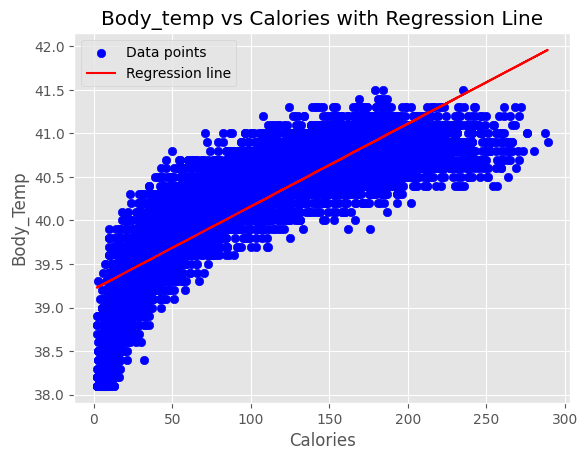

In [43]:
# Filter the dataset to remove the outliers
x = dataset[(dataset['Body_Temp'] >= lower_bound) & (dataset['Body_Temp'] <= upper_bound)]['Calories'].values.reshape(-1, 1)
y = dataset[(dataset['Body_Temp'] >= lower_bound) & (dataset['Body_Temp'] <= upper_bound)]['Body_Temp'].values

# Create and fit the model
model = LinearRegression()
model.fit(x, y)

# Plot the data and the regression line
plt.scatter(dataset[(dataset['Body_Temp'] >= lower_bound) & (dataset['Body_Temp'] <= upper_bound)]['Calories'], dataset[(dataset['Body_Temp'] >= lower_bound) & (dataset['Body_Temp'] <= upper_bound)]['Body_Temp'], color='blue', label='Data points')
plt.plot(dataset[(dataset['Body_Temp'] >= lower_bound) & (dataset['Body_Temp'] <= upper_bound)]['Calories'], model.predict(x), color='red', label='Regression line')
plt.xlabel('Calories')
plt.ylabel('Body_Temp')
plt.title('Body_temp vs Calories with Regression Line')
plt.legend()
plt.show()

In [44]:
# Predict the heart rates for the outliers using the regression model
predicted_Body_Temp = model.predict(dataset[(dataset['Body_Temp'] < lower_bound) | (dataset['Body_Temp'] > upper_bound)]['Calories'].values.reshape(-1, 1))

# Replace the outliers with the predicted weights
dataset.loc[(dataset['Body_Temp'] < lower_bound) | (dataset['Body_Temp'] > upper_bound), 'Body_Temp'] = predicted_Body_Temp

# Verify the changes
dataset[(dataset['Body_Temp'] < lower_bound) | (dataset['Body_Temp'] > upper_bound)]

,Calories,Gender,Age,Height,Weight,Heart_Rate,Body_Temp,duration_1.0,duration_2.0,duration_3.0,...,duration_21.0,duration_22.0,duration_23.0,duration_24.0,duration_25.0,duration_26.0,duration_27.0,duration_28.0,duration_29.0,duration_30.0
User_ID,,,,,,,,,,,,,,,,,,,,,


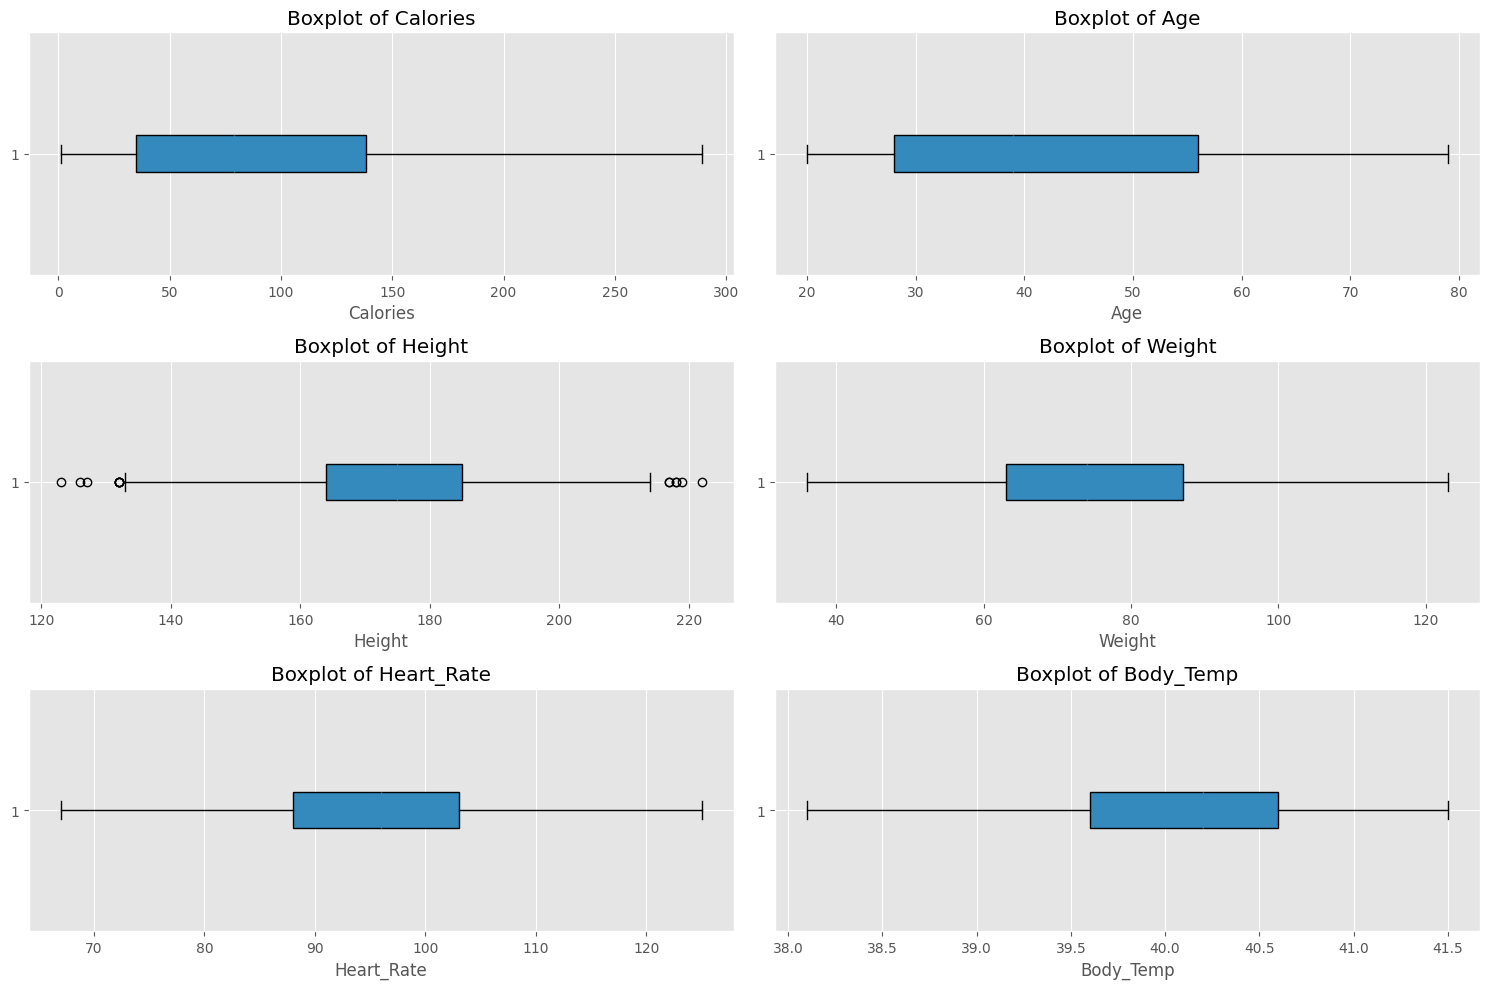

In [45]:
plt.style.use('ggplot')

# Define the number of rows and columns for the subplots
num_rows = 3
num_cols = 2

# Create the subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 10))

# List of columns to plot
columns_to_plot = ['Calories', 'Age', 'Height', 'Weight', 'Heart_Rate', 'Body_Temp']

# Plot each boxplot in the corresponding subplot
for i, column in enumerate(columns_to_plot):
    row = i // num_cols
    col = i % num_cols
    axs[row, col].boxplot(dataset[column], vert=False, patch_artist=True)
    axs[row, col].set_title(f'Boxplot of {column}')
    axs[row, col].set_xlabel(column)

plt.tight_layout()
plt.show()

In [46]:
dataset.head()

,Calories,Gender,Age,Height,Weight,Heart_Rate,Body_Temp,duration_1.0,duration_2.0,duration_3.0,...,duration_21.0,duration_22.0,duration_23.0,duration_24.0,duration_25.0,duration_26.0,duration_27.0,duration_28.0,duration_29.0,duration_30.0
User_ID,,,,,,,,,,,,,,,,,,,,,
14733363,231.0,1,68,190.0,94.0,105.0,40.8,False,False,False,...,False,False,False,False,False,False,False,False,True,False
14861698,66.0,0,20,166.0,60.0,94.0,40.3,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11179863,26.0,1,69,179.0,79.0,88.0,38.7,False,False,False,...,False,False,False,False,False,False,False,False,False,False
16180408,71.0,0,34,179.0,71.0,100.0,40.5,False,False,False,...,False,False,False,False,False,False,False,False,False,False
17771927,35.0,0,27,154.0,58.0,81.0,39.8,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Now the dataset is cleaned and ready for analysis.

#### Splitting the dataset into the Training set and Test set

In [47]:
dataset.columns

Index(['Calories', 'Gender', 'Age', 'Height', 'Weight', 'Heart_Rate',
       'Body_Temp', 'duration_1.0', 'duration_2.0', 'duration_3.0',
       'duration_4.0', 'duration_5.0', 'duration_6.0', 'duration_7.0',
       'duration_8.0', 'duration_9.0', 'duration_10.0', 'duration_11.0',
       'duration_12.0', 'duration_13.0', 'duration_14.0', 'duration_15.0',
       'duration_16.0', 'duration_17.0', 'duration_18.0', 'duration_19.0',
       'duration_20.0', 'duration_21.0', 'duration_22.0', 'duration_23.0',
       'duration_24.0', 'duration_25.0', 'duration_26.0', 'duration_27.0',
       'duration_28.0', 'duration_29.0', 'duration_30.0'],
      dtype='object')

In [48]:
x = dataset.iloc[:,1:].values
y = dataset.iloc[:,0].values

In [49]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [50]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train[:,3:] = sc.fit_transform(X_train[:,3:])
X_test[:,3:] = sc.transform(X_test[:,3:])

### Training the Multiple Linear Regression model on the Training set

In [51]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [52]:
# Display model summary information
print("Model Summary")
print("====================")
print(f"Coefficients: {regressor.coef_}")
print(f"Intercept: {regressor.intercept_}")
print(f"R-squared score: {regressor.score(X_test, y_test)}")

Model Summary
Coefficients: [-1.38923718  0.48998084 -0.20801979  4.85764098 18.85774953  0.11607428
 -7.04468276 -9.57752206 -9.69092031 -9.41692901 -9.05217061 -8.86809648
 -7.81831927 -7.51937115 -6.87960333 -6.46165684 -5.28123938 -4.69575597
 -3.93767929 -2.99583657 -2.16847417 -1.28562307 -0.0488936   0.97191932
  2.05262065  3.09727706  4.19242862  5.42445676  6.49593677  8.22805008
  9.5691943  11.43330417 12.08926993 14.22085079 14.48174207 11.96051915]
Intercept: 105.3781841632371
R-squared score: 0.9753853975618287


#### Predicting the Test set results

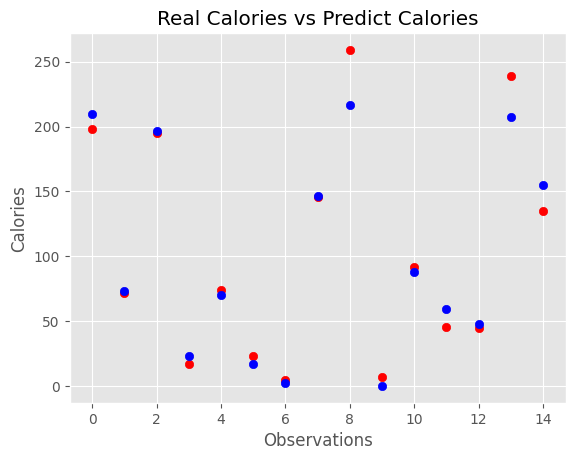

In [53]:
plt.scatter(x=range(0,15),y=y_test[0:15],color='red')
plt.scatter(x=range(0,15),y=regressor.predict(X_test)[0:15],color='blue')
plt.title("Real Calories vs Predict Calories")
plt.xlabel("Observations")
plt.ylabel("Calories")
plt.show()

In [54]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((np.array(y_test).reshape(len(y_pred),1),y_pred.reshape(len(y_pred),1)),axis=1))

[[198.   209.87]
 [ 72.    73.43]
 [195.   196.9 ]
 ...
 [ 28.    29.29]
 [108.   120.71]
 [ 15.    -5.18]]


#### Ridge Regression

Similar to linear regression but adds a penalty term to the loss function to prevent overfitting, particularly useful when dealing with highly correlated features.

Ridge Regression Model Summary
Coefficients: [-1.38  0.49 -0.21  4.85 18.86  0.15 -7.04 -9.56 -9.68 -9.41 -9.04 -8.86
 -7.81 -7.51 -6.88 -6.46 -5.28 -4.69 -3.94 -3.   -2.17 -1.29 -0.05  0.97
  2.05  3.09  4.19  5.42  6.49  8.22  9.56 11.43 12.08 14.21 14.47 11.95]
Intercept: 105.29331131943667
R-squared score: 0.9753859051968172


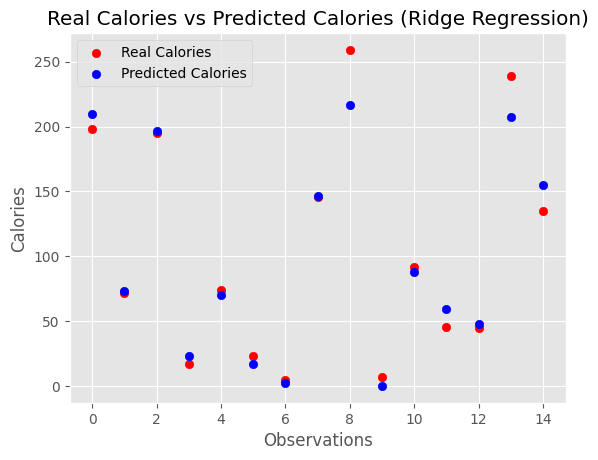

In [55]:
from sklearn.linear_model import Ridge

# Initialize the Ridge regressor with an alpha value
ridge_regressor = Ridge(alpha=1.0)

# Fit the Ridge regressor to the training data
ridge_regressor.fit(X_train, y_train)

# Predict the test set results
y_pred_ridge = ridge_regressor.predict(X_test)

# Display model summary information
print("Ridge Regression Model Summary")
print("==============================")
print(f"Coefficients: {ridge_regressor.coef_}")
print(f"Intercept: {ridge_regressor.intercept_}")
print(f"R-squared score: {ridge_regressor.score(X_test, y_test)}")

# Plot the real vs predicted Calories
plt.scatter(range(0, 15), y_test[0:15], color='red', label='Real Calories')
plt.scatter(range(0, 15), y_pred_ridge[0:15], color='blue', label='Predicted Calories')
plt.title("Real Calories vs Predicted Calories (Ridge Regression)")
plt.xlabel("Observations")
plt.ylabel("Calories")
plt.legend()
plt.show()

#### Lasso Regression
Like Ridge Regression, but uses an absolute value penalty, which can lead to feature selection by setting some coefficients to zero. 

Lasso Regression Model Summary
Coefficients: [ 0.    0.51  0.07  0.   26.79 18.6  -0.52  0.    0.   -0.   -0.29 -0.96
 -1.19 -1.48 -1.6  -1.9  -1.27 -1.47 -1.18 -0.75 -0.21 -0.    0.    0.
  0.17  1.06  1.71  2.46  3.2   4.59  5.5   6.93  7.56  9.13  9.46  7.71]
Intercept: 54.851208430688956
R-squared score: 0.9571103408496914


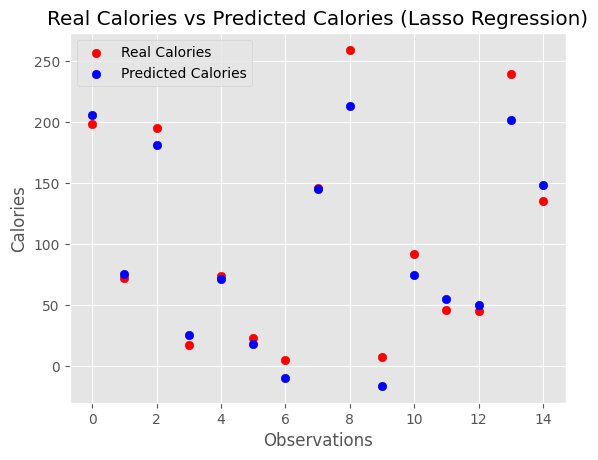

In [56]:
from sklearn.linear_model import Lasso

# Initialize the Lasso regressor with an alpha value
lasso_regressor = Lasso(alpha=1.0)

# Fit the Lasso regressor to the training data
lasso_regressor.fit(X_train, y_train)

# Predict the test set results
y_pred_lasso = lasso_regressor.predict(X_test)

# Display model summary information
print("Lasso Regression Model Summary")
print("==============================")
print(f"Coefficients: {lasso_regressor.coef_}")
print(f"Intercept: {lasso_regressor.intercept_}")
print(f"R-squared score: {lasso_regressor.score(X_test, y_test)}")

# Plot the real vs predicted Calories
plt.scatter(range(0, 15), y_test[0:15], color='red', label='Real Calories')
plt.scatter(range(0, 15), y_pred_lasso[0:15], color='blue', label='Predicted Calories')
plt.title("Real Calories vs Predicted Calories (Lasso Regression)")
plt.xlabel("Observations")
plt.ylabel("Calories")
plt.legend()
plt.show()

#### Polynomial Regression
Extends linear regression by adding polynomial terms to the model, allowing for non-linear relationships between variables. 

Polynomial Regression Model Summary
Coefficients: [-1.93e-11 -9.77e+00  3.04e-01 -1.86e-02 -2.25e+00  1.97e+01  4.49e+00
 -1.79e-01 -3.78e-01 -4.45e-01 -4.25e-01 -3.95e-01 -4.16e-01 -3.24e-01
 -2.65e-01 -2.40e-01 -1.53e-01 -1.59e-01 -1.23e-01 -8.37e-02 -6.04e-02
 -1.17e-02  2.87e-02  6.48e-02  1.38e-01  1.45e-01  1.29e-01  2.19e-01
  2.23e-01  1.97e-01  3.01e-01  4.05e-01  4.59e-01  4.07e-01  3.95e-01
  3.82e-01  1.42e-01 -9.77e+00  4.77e-01  1.76e-05  8.19e+00  6.30e+00
 -1.83e-01  1.25e+00  1.64e+00  1.15e+00  9.63e-01  9.40e-01  6.74e-01
  3.36e-01  9.37e-02  1.65e-01 -2.15e-01 -1.84e-01 -2.82e-01 -3.68e-01
 -4.73e-01 -5.61e-01 -6.07e-01 -6.59e-01 -6.29e-01 -6.53e-01 -6.53e-01
 -4.40e-01 -4.91e-01 -4.32e-01 -3.51e-01 -3.20e-01 -1.61e-01 -4.42e-02
  2.95e-01  3.12e-01  2.95e-01 -1.56e-04 -8.85e-05 -9.64e-04 -8.67e-03
  1.29e-02 -5.66e-02 -7.35e-02 -6.55e-02 -6.00e-02 -6.01e-02 -5.80e-02
 -5.01e-02 -4.41e-02 -3.85e-02 -3.41e-02 -2.67e-02 -2.02e-02 -1.42e-02
 -9.54e-03 -3.78e-03  1.94e

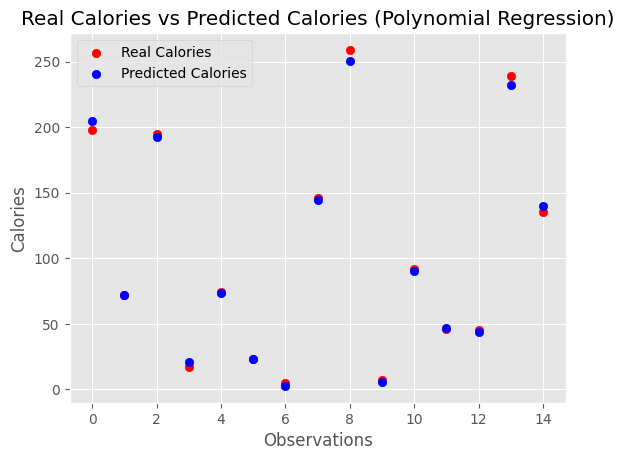

In [57]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Transform the features into polynomial features
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Fit the Polynomial Regression model
poly_regressor = LinearRegression()
poly_regressor.fit(X_train_poly, y_train)

# Predict the test set results
y_pred_poly = poly_regressor.predict(X_test_poly)

# Display model summary information
print("Polynomial Regression Model Summary")
print("===================================")
print(f"Coefficients: {poly_regressor.coef_}")
print(f"Intercept: {poly_regressor.intercept_}")
print(f"R-squared score: {poly_regressor.score(X_test_poly, y_test)}")

# Plot the real vs predicted Calories
plt.scatter(range(0, 15), y_test[0:15], color='red', label='Real Calories')
plt.scatter(range(0, 15), y_pred_poly[0:15], color='blue', label='Predicted Calories')
plt.title("Real Calories vs Predicted Calories (Polynomial Regression)")
plt.xlabel("Observations")
plt.ylabel("Calories")
plt.legend()
plt.show()

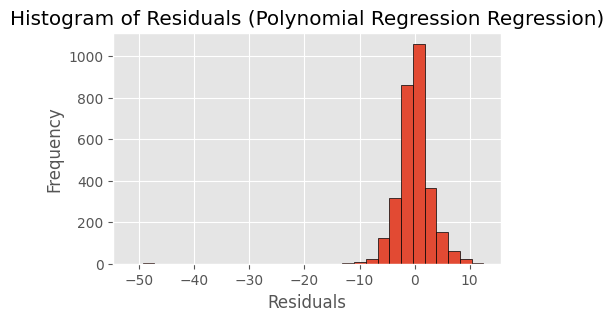

In [81]:
# Calculate the residuals for the Polynomial Regression model
residuals_rf = y_test - y_pred_poly

# Plot the histogram of the residuals
plt.figure(figsize=(5, 3))
plt.hist(residuals_rf, bins=30, edgecolor='black')
plt.title('Histogram of Residuals (Polynomial Regression Regression)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

#### Decision Tree Regression
A tree-based model that splits data based on features to predict a continuous value, capable of handling non-linear relationships. 

Decision Tree Regression Model Summary
R-squared score: 0.9794482789810822


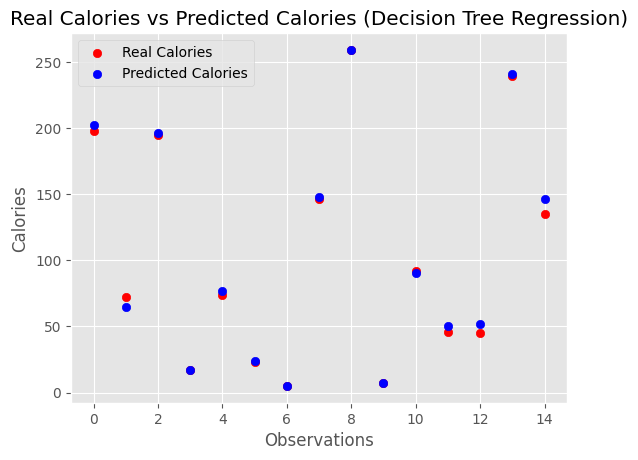

In [58]:
from sklearn.tree import DecisionTreeRegressor

# Initialize the Decision Tree Regressor
tree_regressor = DecisionTreeRegressor(random_state=1)

# Fit the regressor to the training data
tree_regressor.fit(X_train, y_train)

# Predict the test set results
y_pred_tree = tree_regressor.predict(X_test)

# Display model summary information
print("Decision Tree Regression Model Summary")
print("======================================")
print(f"R-squared score: {tree_regressor.score(X_test, y_test)}")

# Plot the real vs predicted Calories
plt.scatter(range(0, 15), y_test[0:15], color='red', label='Real Calories')
plt.scatter(range(0, 15), y_pred_tree[0:15], color='blue', label='Predicted Calories')
plt.title("Real Calories vs Predicted Calories (Decision Tree Regression)")
plt.xlabel("Observations")
plt.ylabel("Calories")
plt.legend()
plt.show()

#### Random Forest Regression
An ensemble method that combines multiple decision trees to improve prediction accuracy and reduce variance.

Random Forest Regression Model Summary
R-squared score: 0.9908299210945826


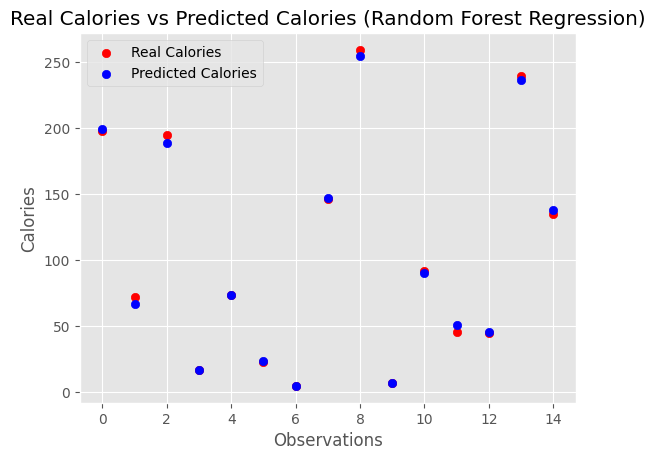

In [59]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=1)

# Fit the regressor to the training data
rf_regressor.fit(X_train, y_train)

# Predict the test set results
y_pred_rf = rf_regressor.predict(X_test)

# Display model summary information
print("Random Forest Regression Model Summary")
print("======================================")
print(f"R-squared score: {rf_regressor.score(X_test, y_test)}")

# Plot the real vs predicted Calories
plt.scatter(range(0, 15), y_test[0:15], color='red', label='Real Calories')
plt.scatter(range(0, 15), y_pred_rf[0:15], color='blue', label='Predicted Calories')
plt.title("Real Calories vs Predicted Calories (Random Forest Regression)")
plt.xlabel("Observations")
plt.ylabel("Calories")
plt.legend()
plt.show()

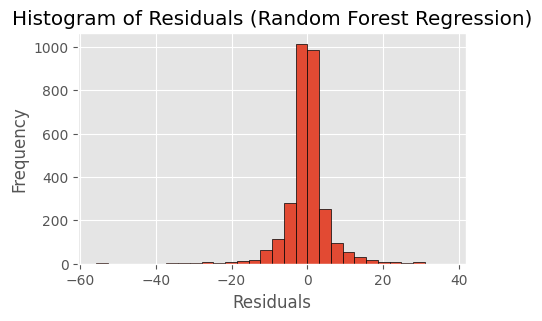

In [80]:
# Calculate the residuals for the random forest model
residuals_rf = y_test - y_pred_rf

# Plot the histogram of the residuals
plt.figure(figsize=(5, 3))
plt.hist(residuals_rf, bins=30, edgecolor='black')
plt.title('Histogram of Residuals (Random Forest Regression)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

The second-order polynomial regression model is the best among all the models, considering R-squared as the metric for accuracy.

### Forecast 

In [83]:
# Display polynomial regression model summary information
print("Polynomial Regression Model Summary")
print("===================================")
print(f"Coefficients: {poly_regressor.coef_}")
print(f"Intercept: {poly_regressor.intercept_}")
print(f"R-squared score: {poly_regressor.score(X_test_poly, y_test)}")

Polynomial Regression Model Summary
Coefficients: [-1.93e-11 -9.77e+00  3.04e-01 -1.86e-02 -2.25e+00  1.97e+01  4.49e+00
 -1.79e-01 -3.78e-01 -4.45e-01 -4.25e-01 -3.95e-01 -4.16e-01 -3.24e-01
 -2.65e-01 -2.40e-01 -1.53e-01 -1.59e-01 -1.23e-01 -8.37e-02 -6.04e-02
 -1.17e-02  2.87e-02  6.48e-02  1.38e-01  1.45e-01  1.29e-01  2.19e-01
  2.23e-01  1.97e-01  3.01e-01  4.05e-01  4.59e-01  4.07e-01  3.95e-01
  3.82e-01  1.42e-01 -9.77e+00  4.77e-01  1.76e-05  8.19e+00  6.30e+00
 -1.83e-01  1.25e+00  1.64e+00  1.15e+00  9.63e-01  9.40e-01  6.74e-01
  3.36e-01  9.37e-02  1.65e-01 -2.15e-01 -1.84e-01 -2.82e-01 -3.68e-01
 -4.73e-01 -5.61e-01 -6.07e-01 -6.59e-01 -6.29e-01 -6.53e-01 -6.53e-01
 -4.40e-01 -4.91e-01 -4.32e-01 -3.51e-01 -3.20e-01 -1.61e-01 -4.42e-02
  2.95e-01  3.12e-01  2.95e-01 -1.56e-04 -8.85e-05 -9.64e-04 -8.67e-03
  1.29e-02 -5.66e-02 -7.35e-02 -6.55e-02 -6.00e-02 -6.01e-02 -5.80e-02
 -5.01e-02 -4.41e-02 -3.85e-02 -3.41e-02 -2.67e-02 -2.02e-02 -1.42e-02
 -9.54e-03 -3.78e-03  1.94e